In [15]:
#  1. Установка библиотек 
!pip install pandas numpy matplotlib seaborn sqlalchemy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\Bulat\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [16]:
#  2. Импорт библиотек и Настройка отображения
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [17]:
#  3. Загрузка данных
df = pd.read_csv(r"C:\Users\Bulat\Desktop\Project_Data_Analysis\vk_skillbox.csv")
df.head()

,Unnamed: 0,date,text,is_pinned,attachments,post_source,comments,likes,reposts,views,len_text,post_source_id,year,month,dayofweek,hour
0,0,2021-11-01 10:32:31,"Нет, это не шутка! Попробовать 34 курса и инте...",1.0,10.0,vk,152,417,719,63145.0,406,1,2021,11,0,10
1,1,2022-01-02 10:18:21,"Интересно, что случилось с теми зайчиками и ли...",0.0,6.0,api,2,26,5,17319.0,427,0,2022,1,6,10
2,2,2021-12-31 10:00:22,"Уверены, по дороге к нашему аккаунту вы успели...",0.0,5.0,api,3,87,57,21783.0,237,0,2021,12,4,10
3,3,2021-12-29 07:00:40,"Пост-напоминалка для всех, кто забыл поздравит...",0.0,8.0,api,4,103,66,24419.0,402,0,2021,12,2,7
4,4,2021-12-28 14:16:42,Периодически слышите фразу: «Мы вам перезвоним...,0.0,6.0,api,0,28,5,19849.0,572,0,2021,12,1,14


In [18]:
#  4. Быстрый обзор данных
print(df.info())          # типы данных и пропуски
print(df.describe())      # базовая статистика
print(df.isna().sum())    # количество пропусков
print(df.duplicated().sum())  # количество дубликатов


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3966 non-null   int64  
 1   date            3966 non-null   object 
 2   text            3873 non-null   object 
 3   is_pinned       3966 non-null   float64
 4   attachments     3966 non-null   float64
 5   post_source     3966 non-null   object 
 6   comments        3966 non-null   int64  
 7   likes           3966 non-null   int64  
 8   reposts         3966 non-null   int64  
 9   views           3966 non-null   float64
 10  len_text        3966 non-null   int64  
 11  post_source_id  3966 non-null   int64  
 12  year            3966 non-null   int64  
 13  month           3966 non-null   int64  
 14  dayofweek       3966 non-null   int64  
 15  hour            3966 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 495.9+ KB
None
        Unnam

In [19]:
# 5. Приведение типов и чистка

# Убираем аномальные записи, где количество лайков превышает количество просмотров,
# так как это физически невозможно и свидетельствует о некорректных данных.
invalid_rows = df[df['likes'] > df['views']]
print("Записей с лайками больше просмотров:", invalid_rows.shape[0])

# Преобразуем дату в datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Заполним пропуски в текстах
df['text'] = df['text'].fillna("no_text")

# Заполним пропуски в числовых полях медианой
for col in ['comments','likes','reposts','views']:
    df[col] = df[col].fillna(df[col].median()).astype(int)

# Если is_pinned, attachments или post_source пустые — заполним "unknown"
df['is_pinned'] = df['is_pinned'].fillna("unknown")
df['attachments'] = df['attachments'].fillna("unknown")
df['post_source'] = df['post_source'].fillna("unknown")

# Добавим длину текста как отдельную колонку
df['text_len'] = df['text'].apply(lambda x: len(str(x)))


Записей с лайками больше просмотров: 509


In [20]:
#  6. Разделение на таблицы
# Например, посты через web и через api
web_posts = df[df['post_source'].str.contains("web", case=False, na=False)]
api_posts = df[df['post_source'].str.contains("api", case=False, na=False)]

print("Web posts:", web_posts.shape[0])
print("API posts:", api_posts.shape[0])


Web posts: 0
API posts: 1405


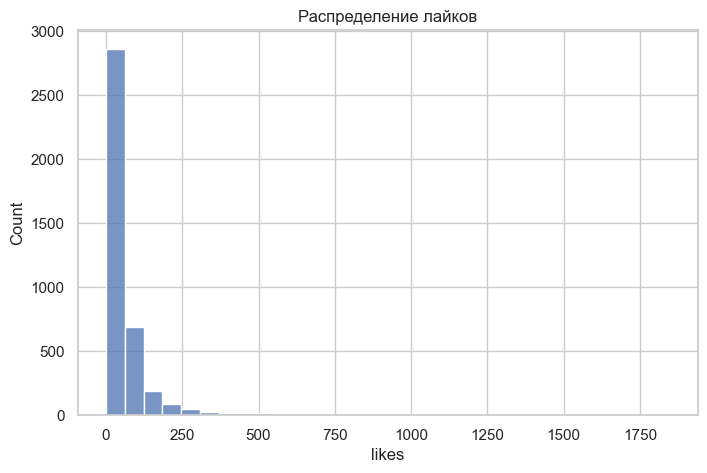

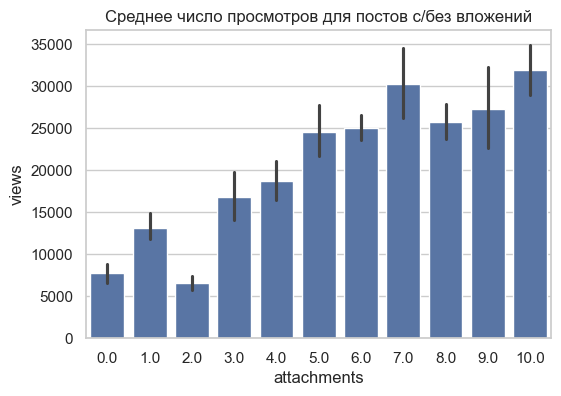

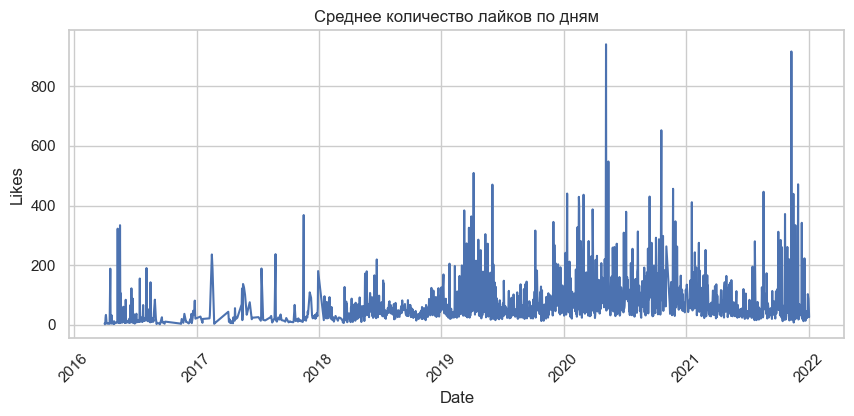

        views  likes  comments
3091  1744092    919         7
216   1075555    246         4
159    165797    211        48
3018   145408    194         7
338    125253     53         2
1415   122821     70        34
181    120200     32        16
2941   103909    211         5
3041   103551    128         6
3402    97191    189         4


In [21]:
#  7. Визуализация

# Распределение лайков
plt.figure(figsize=(8,5))
sns.histplot(df['likes'], bins=30)
plt.title("Распределение лайков")
plt.show()

# Среднее число просмотров для постов с/без вложений
plt.figure(figsize=(6,4))
sns.barplot(x='attachments', y='views', data=df)
plt.title("Среднее число просмотров для постов с/без вложений")
plt.show()

# Динамика лайков по времени (среднее в день)
likes_by_date = df.groupby(df['date'].dt.date)['likes'].mean()
plt.figure(figsize=(10,4))
likes_by_date.plot()
plt.title("Среднее количество лайков по дням")
plt.ylabel("Likes")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

# Топ-10 постов по просмотрам
top_posts = df.nlargest(10, 'views')[['views','likes','comments']]
print(top_posts)


In [22]:
#  8. Пример проверки гипотез ===
# Гипотеза: посты с вложениями получают больше лайков

likes_attach = df.groupby('attachments')['likes'].mean()
print("Среднее число лайков в зависимости от вложений:")
print(likes_attach)

# Гипотеза: закреплённые посты популярнее
likes_pinned = df.groupby('is_pinned')['likes'].mean()
print("\nСреднее число лайков у закреплённых постов:")
print(likes_pinned)

Среднее число лайков в зависимости от вложений:
attachments
0.0      24.647059
1.0      49.227682
2.0      47.901575
3.0      76.663636
4.0      71.481928
5.0     110.470588
6.0     113.994475
7.0     183.791667
8.0     118.812500
9.0     153.694444
10.0    186.310680
Name: likes, dtype: float64

Среднее число лайков у закреплённых постов:
is_pinned
0.0     61.618916
1.0    417.000000
Name: likes, dtype: float64


In [23]:
# 9. Cохранение промежуточных результатов
df.to_csv('vk_cleaned.csv', index=False)